In [2]:
# !pip install pyjanitor pyjanitor pyvis --quiet

In [3]:
import pandas as pd
import janitor
import datetime

from IPython.core.display import display, HTML
from pyvis import network as net
import networkx as nx

/var/folders/ld/lzj7sybn12d9khvdm4qgtcq40000gn/T/ipykernel_26577/282497062.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
df = pd.read_csv('Connections.csv', skiprows=2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     489 non-null    object
 1   Last Name      489 non-null    object
 2   URL            489 non-null    object
 3   Email Address  11 non-null     object
 4   Company        483 non-null    object
 5   Position       484 non-null    object
 6   Connected On   495 non-null    object
dtypes: object(7)
memory usage: 27.2+ KB


# data cleaning

In [6]:
df = (
    df
    .clean_names() # remove spacing and capitalization
    .drop( columns = [ 'first_name', 'last_name', 'email_address' ] ) # drop for privacy
    .dropna( subset = [ 'company', 'position' ] ) # drop missing values in company and position
    .to_datetime( 'connected_on', format = '%d %b %Y' )
  )
df.head()

/Users/yinglin/opt/anaconda3/envs/test/lib/python3.12/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.transform_columns` instead.
  return method(self._obj, *args, **kwargs)


,url,company,position,connected_on
1,https://www.linkedin.com/in/nichole-anqi-shi,Structure Therapeutics,"EA, Operations",2023-12-28
2,https://www.linkedin.com/in/xingying-chen-ba43...,NYC Department for the Aging,Community Coordinator,2023-12-28
3,https://www.linkedin.com/in/margaritatararina,Bristol Myers Squibb,Senior Scientist,2023-12-24
5,https://www.linkedin.com/in/voliynyk,CellSense Technologies GmbH,Manager Development and Applications,2023-12-23
6,https://www.linkedin.com/in/steven-goulas,leaseClub,Co-Founder & CEO,2023-12-23


In [7]:
df['company'].value_counts().head(10)

company
Intra-Cellular Therapies                21
Boston University                       18
Pfizer                                  16
The Rockefeller University              14
Biogen                                  11
Boston University School of Medicine    11
Vertex Pharmaceuticals                   7
CRISPR Therapeutics                      7
Bristol Myers Squibb                     6
Sanofi                                   5
Name: count, dtype: int64

In [8]:
d = df['company'].value_counts()
d

company
Intra-Cellular Therapies      21
Boston University             18
Pfizer                        16
The Rockefeller University    14
Biogen                        11
                              ..
Azenta Life Sciences           1
Neuraville                     1
Connexis Search Group          1
Resolute Data Science LLC      1
Northeastern University        1
Name: count, Length: 316, dtype: int64

/var/folders/ld/lzj7sybn12d9khvdm4qgtcq40000gn/T/ipykernel_26577/1298535563.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_companies_count.values, y=top_companies_count.index, palette="Blues")


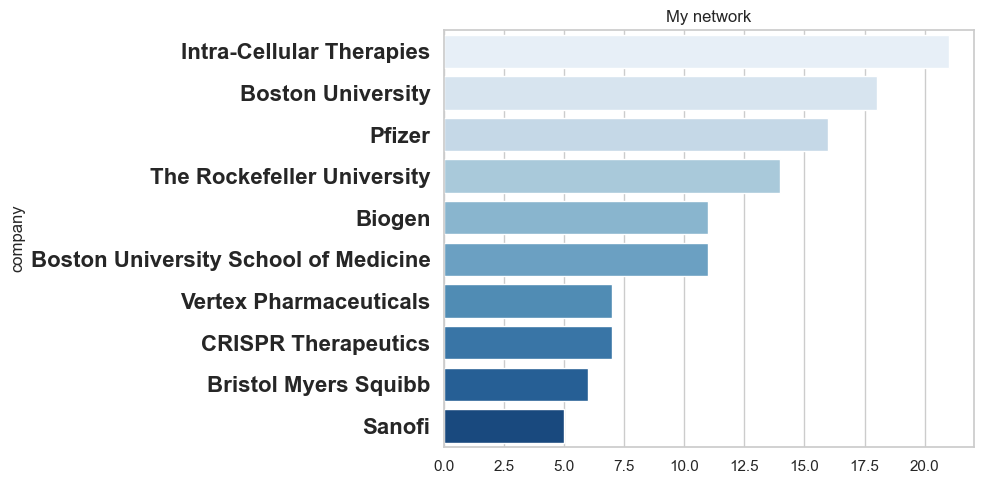

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and top companies count data is available
top_companies_count = df['company'].value_counts().head(10)

# Plot the top companies based on count
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_companies_count.values, y=top_companies_count.index, palette="Blues")

# Customize the plot
plt.title('My network')
# plt.ylabel(' ')

for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(16)
    tick.set_weight('bold')

plt.tight_layout()

plt.savefig('network.png')

plt.show()


/var/folders/ld/lzj7sybn12d9khvdm4qgtcq40000gn/T/ipykernel_26577/9511495.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies_count.values, y=top_companies_count.index, palette="Blues")
/var/folders/ld/lzj7sybn12d9khvdm4qgtcq40000gn/T/ipykernel_26577/9511495.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


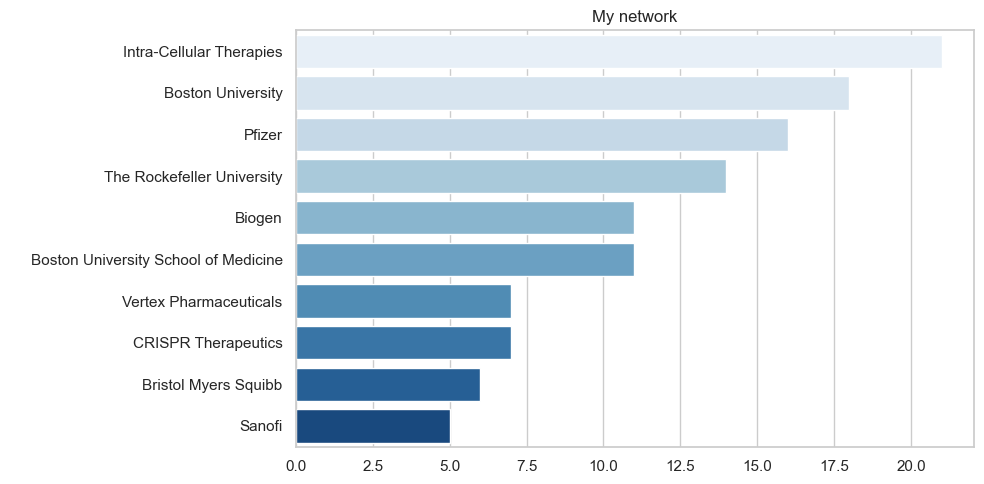

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and top companies count data is available
top_companies_count = df['company'].value_counts().head(10)

# Plot the top companies based on count
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x=top_companies_count.values, y=top_companies_count.index, palette="Blues") 

# Customize the plot
plt.title('My network')

plt.ylabel(' ')

ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)

plt.tight_layout()

plt.savefig('network.png')

# Show the plot
plt.show()


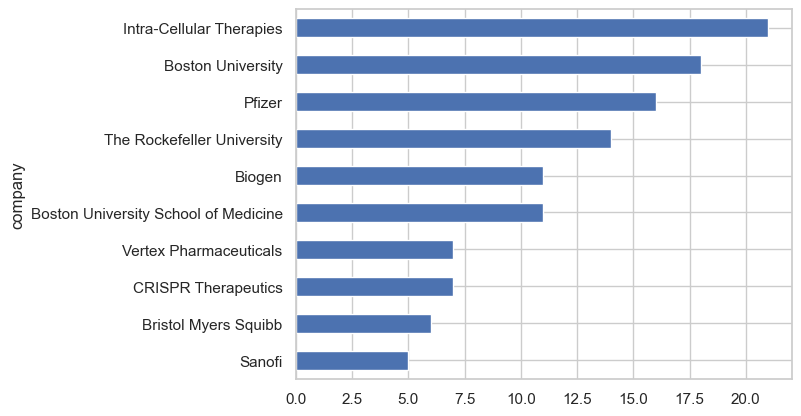

In [11]:
#!pip install matplotlib
df['company'].value_counts().head(10).plot(kind="barh", ).invert_yaxis();

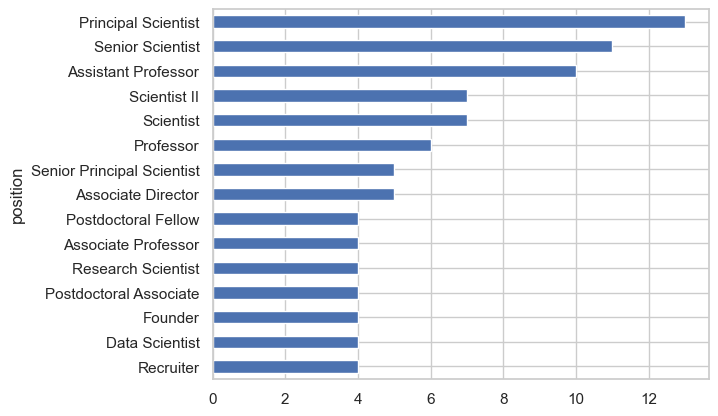

In [12]:
df['position'].value_counts().head(15).plot(kind='barh').invert_yaxis()

<Axes: >

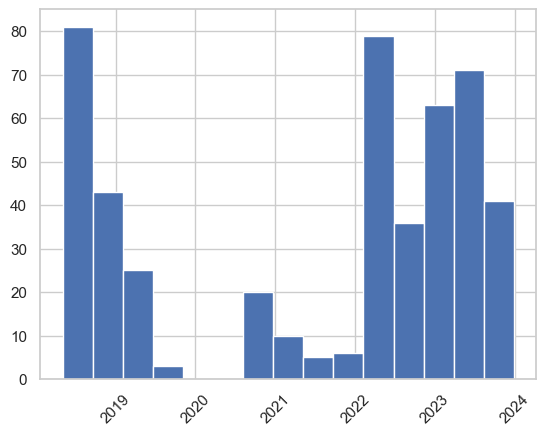

In [13]:
df['connected_on'].hist( xrot=45, bins=15 )

In [14]:
df_company = df['company'].value_counts().reset_index()
df_company.columns = ['company', 'count']
df_company = df_company.sort_values(by="count", ascending=False)
df_company.head(10)   

,company,count
0,Intra-Cellular Therapies,21
1,Boston University,18
2,Pfizer,16
3,The Rockefeller University,14
4,Biogen,11
5,Boston University School of Medicine,11
6,Vertex Pharmaceuticals,7
7,CRISPR Therapeutics,7
8,Bristol Myers Squibb,6
9,Sanofi,5


In [15]:
df_position = df['position'].value_counts().reset_index()
df_position.columns = ['position', 'count']
df_position = df_position.sort_values(by="count", ascending=False)
df_position.head(10)

,position,count
0,Principal Scientist,13
1,Senior Scientist,11
2,Assistant Professor,10
4,Scientist,7
3,Scientist II,7
5,Professor,6
7,Associate Director,5
6,Senior Principal Scientist,5
8,Postdoctoral Fellow,4
9,Associate Professor,4


# creating the network

In [16]:

from IPython.display import display, HTML, IFrame
nt = net.Network(notebook=True, cdn_resources='remote')

g = nx.Graph()
g.add_node(0, label = "root") # intialize yourself as central node
g.add_node(1, label = "Company 1", size=10, title="info1")
g.add_node(2, label = "Company 2", size=40, title="info2")
g.add_node(3, label = "Company 3", size=60, title="info3")
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(0, 3)

nt.from_nx(g)
# nt.show('nodes.html')
# display(HTML('nodes.html'))

# Use IFrame to embed the HTML file in the notebook
display(IFrame(src='nodes.html', width=700, height=500))
nt.show('nodes.html')


nodes.html


In [17]:
print(f"number of nodes: {g.number_of_nodes()}")
print(f"number of edges: {g.number_of_edges()}")

number of nodes: 4
number of edges: 3


In [18]:
for _, row in df_company.head(5).iterrows():
  print(row['company'] + "-" + str(row['count']))

Intra-Cellular Therapies-21
Boston University-18
Pfizer-16
The Rockefeller University-14
Biogen-11


In [19]:
print(df_company.shape)
df_company_reduced = df_company.loc[df_company['count']>=3]
print(df_company_reduced.shape)

(316, 2)
(23, 2)


In [20]:
print(df_position.shape)
df_position_reduced = df_position.loc[df_position['count']>=3]
print(df_position_reduced.shape)

(373, 2)
(23, 2)


# create a network graph

In [44]:
company = row['company']
company

'Novartis Institutes for BioMedical Research (NIBR)'

In [45]:
count = row['count']
count

3

In [54]:
# test

import networkx as nx
import pandas as pd

# Your DataFrame (df_company_reduced) should be defined before using this code

# Initialize the graph
g = nx.Graph()
g.add_node('Amy')  # initialize yourself as the central node

# Use iterrows to iterate through the data frame
for _, row in df_company_reduced.iterrows():
    # store company name and count
    company = row['company']
    count = row['count']

    # title = f"{company} - {count}"
    positions = set( [ x for x in df[company == df['company']]['position'] ] )
    positions = ''.join('{}'.format(x) for x in positions)

    position_list = f"{positions}"
    # hover_info = title + position_list

    g.add_node(company, size=count * 2, title=hover_info, color='blue')
    g.add_edge('Amy', company, color='white')


# Generate the graph
nt = net.Network(height='800px', width='800px', bgcolor="black", 
                 font_color='white', notebook=True, cdn_resources='in_line')
nt.from_nx(g)
nt.hrepulsion()

# More customization: https://tinyurl.com/yf5lvvdm

# Display the graph directly in the notebook
nt.show('company_graph_2.html')

company_graph_2.html


In [56]:
import networkx as nx
import pandas as pd
# import net

# Your DataFrame (df_company_reduced) should be defined before using this code

# Initialize the graph
g = nx.Graph()
g.add_node('Amy')  # initialize yourself as the central node

# Use iterrows to iterate through the data frame
for _, row in df_company_reduced.iterrows():
    # store company name and count
    company = row['company']
    count = row['count']

    title = f"{company} – {count}"
    positions = set([x for x in df[company == df['company']]['position']])
    positions = ''.join('{}'.format(x) for x in positions)

    position_list = f"{positions}"
    hover_info = title + position_list

    g.add_node(company, size=count * 2, title=hover_info, color='#3449eb')
    g.add_edge('Amy', company, color='grey')

# Generate the graph
nt = net.Network(height='800px', width='800px', bgcolor="black", font_color='white', notebook=True, cdn_resources='in_line')
nt.from_nx(g)
nt.hrepulsion()

# More customization: https://tinyurl.com/yf5lvvdm

# Display the graph directly in the notebook
nt.show('company_graph.html')


company_graph.html


/var/folders/ld/lzj7sybn12d9khvdm4qgtcq40000gn/T/ipykernel_29118/2588417286.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_companies_count.values, y=top_companies_count.index, palette="Blues")


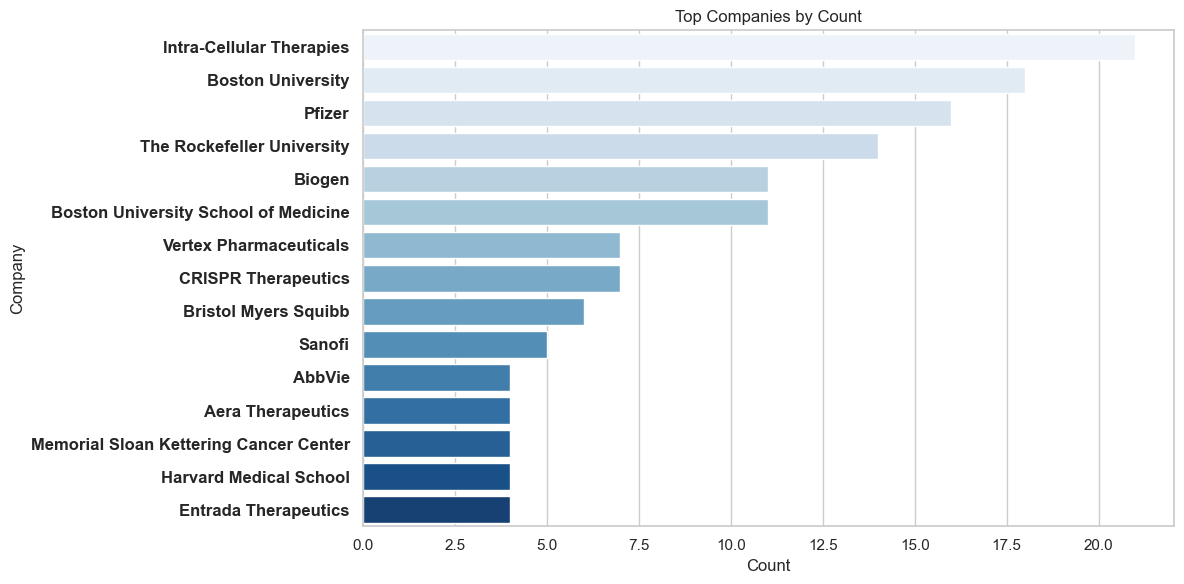

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and top companies count data is available
top_companies_count = df['company'].value_counts().head(15)

# Plot the top companies based on count
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_companies_count.values, y=top_companies_count.index, palette="Blues")

# Customize the plot
plt.title('Top Companies by Count')
plt.xlabel('Count')
plt.ylabel('Company')

# Increase y-axis tick label font size and make it bold
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(12)
    tick.set_weight('bold')

plt.tight_layout()

plt.savefig('top_companies_plot.png')

# Show the plot
plt.show()


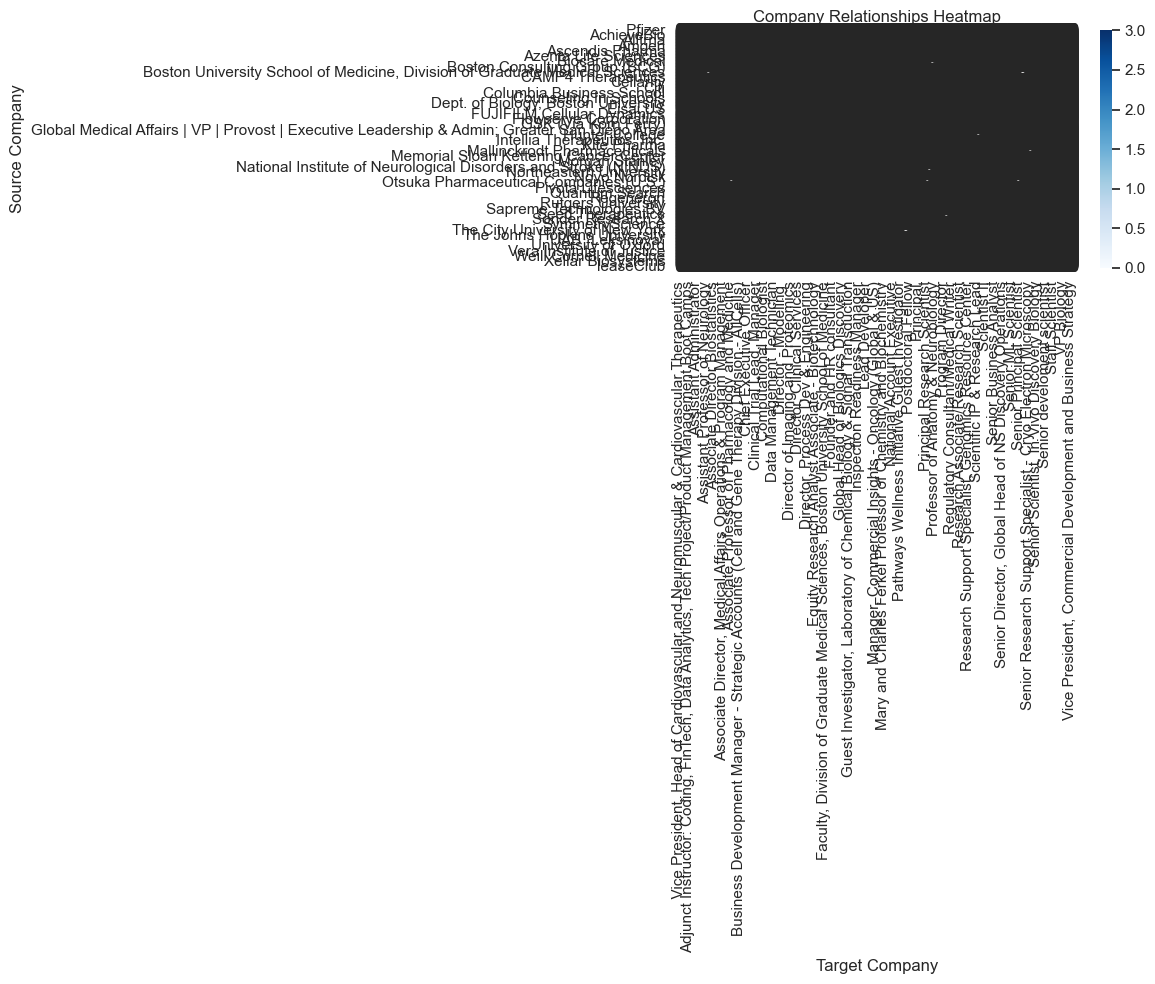

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you have adjacency matrix or similar data
# Example adjacency matrix where rows and columns represent companies, and values represent relationships
adjacency_matrix = pd.crosstab(df['company'], df['position'])

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(adjacency_matrix, cmap="Blues", annot=True, fmt="d")

# Customize the plot
plt.title('Company Relationships Heatmap')
plt.xlabel('Target Company')
plt.ylabel('Source Company')

plt.tight_layout()

plt.savefig('company_relationships_heatmap.png')
plt.show()
